# **Employee Attrition Analysis and Prediction¶**

This project presents the full pipeline to analyze and predict employee attrition using the IBM HR Analytics dataset. This predictive approach enables HR departments to take proactive measures, ultimately improving employee retention and maintaining a stable workforce. It is structured into three key sections to provide a complete workflow from data preparation to actionable results.

**📁 Sections:**

1️⃣ Data Preprocessing
Handle missing values
Encode categorical features
Prepare data for analysis and modeling.

2️⃣ Exploratory Data Analysis (EDA)
Visualize data distributions and relationships.
Identify key features contributing to attrition.

3️⃣ Predictive Modeling & Results
Train and evaluate machine learning models (Logistic Regression, Random Forest, XGBoost).
Tune hyperparameters and compare performance using (accuracy, precision, recall, F1-score).
Deliver actionable HR recommendations based on findings.

📌 Dataset:
Source: Kaggle – IBM HR Analytics Employee Attrition

🛠️ Tools Used:
Python: Pandas, NumPy, Matplotlib, Seaborn


#Importing Libraries

In [24]:
import os
import numpy as np
import pandas as pd
import sklearn as sns
import matplotlib.pyplot as plt

In [25]:
from google.colab import files
data_to_load = files.upload()

Saving HR-Employee-Attrition.csv to HR-Employee-Attrition (2).csv


# Data Loading and Preprocessing

In [27]:
import io
hr_df = pd.read_csv('HR-Employee-Attrition (1).csv')

In [28]:
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [29]:
hr_df.shape

(1470, 35)

In [30]:
hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [31]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [32]:
hr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [35]:
hr_df['JobLevel'].head(10)

,JobLevel
0,2
1,2
2,1
3,1
4,1
5,1
6,1
7,1
8,3
9,2


In [36]:
hr_df['JobRole'].head(10)

,JobRole
0,Sales Executive
1,Research Scientist
2,Laboratory Technician
3,Research Scientist
4,Laboratory Technician
5,Laboratory Technician
6,Laboratory Technician
7,Laboratory Technician
8,Manufacturing Director
9,Healthcare Representative


In [37]:
hr_df.drop(columns=['BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyRate', 'NumCompaniesWorked', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'YearsWithCurrManager'], inplace = True)

In [38]:
hr_df.shape

(1470, 24)

In [39]:
hr_df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


In [40]:
hr_df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,673
Single,470
Divorced,327


In [41]:
hr_df['Gender'].value_counts()

,count
Gender,
Male,882
Female,588


In [42]:
hr_df['Department'].value_counts()

,count
Department,
Research & Development,961
Sales,446
Human Resources,63


In [43]:
hr_df['EnvironmentSatisfaction'].value_counts()

,count
EnvironmentSatisfaction,
3,453
4,446
2,287
1,284


In [44]:
hr_df['OverTime'].value_counts()

,count
OverTime,
No,1054
Yes,416


In [45]:
hr_df['MonthlyIncome'].value_counts()

,count
MonthlyIncome,
2342,4
3452,3
2559,3
2610,3
2451,3
...,...
3041,1
2579,1
5985,1


In [46]:
hr_df.drop(columns=['JobInvolvement', 'HourlyRate', 'EmployeeCount'], inplace = True)

In [48]:
hr_df.shape

(1470, 21)

In [49]:
hr_df.nunique()

,0
Age,43
Attrition,2
Department,3
EducationField,6
EmployeeNumber,1470
EnvironmentSatisfaction,4
Gender,2
JobRole,9
JobSatisfaction,4
MaritalStatus,3


In [50]:
hr_df.isnull().sum()

,0
Age,0
Attrition,0
Department,0
EducationField,0
EmployeeNumber,0
EnvironmentSatisfaction,0
Gender,0
JobRole,0
JobSatisfaction,0
MaritalStatus,0


# Exploratory Data Analysis (EDA)

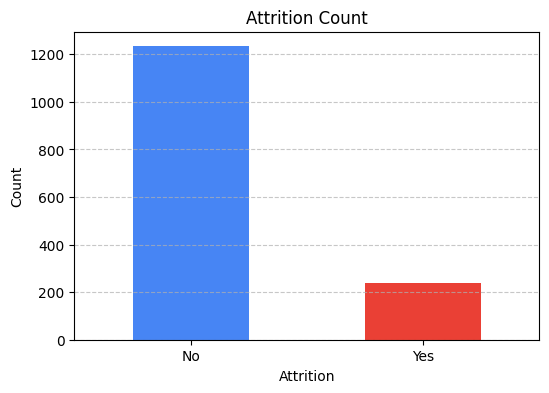

In [54]:
plt.figure(figsize=(6,4))
hr_df['Attrition'].value_counts().plot(kind='bar', color=['#4785F4', '#EA4035'])
plt.title('Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


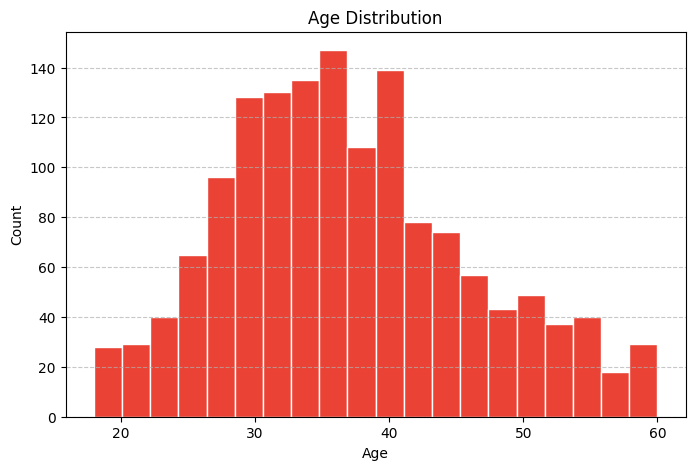

In [57]:
plt.figure(figsize=(8,5))
plt.hist(hr_df['Age'], bins=20,color ='#EA4335', edgecolor='white')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


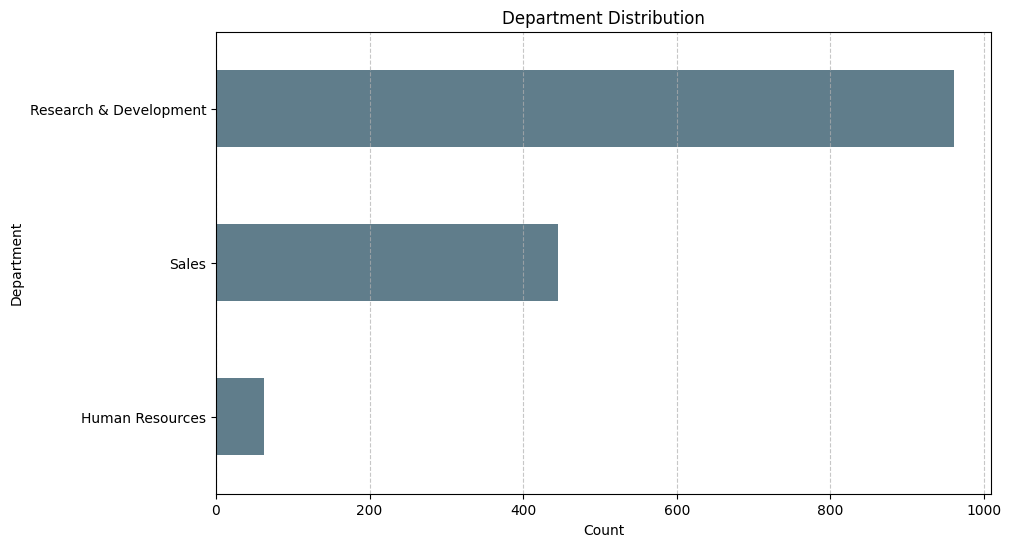

In [58]:
plt.figure(figsize=(10,6))
hr_df['Department'].value_counts().plot(kind='barh', color='#607D8B')
plt.title('Department Distribution')
plt.xlabel('Count')
plt.ylabel('Department')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--',alpha=0.7)
plt.show()

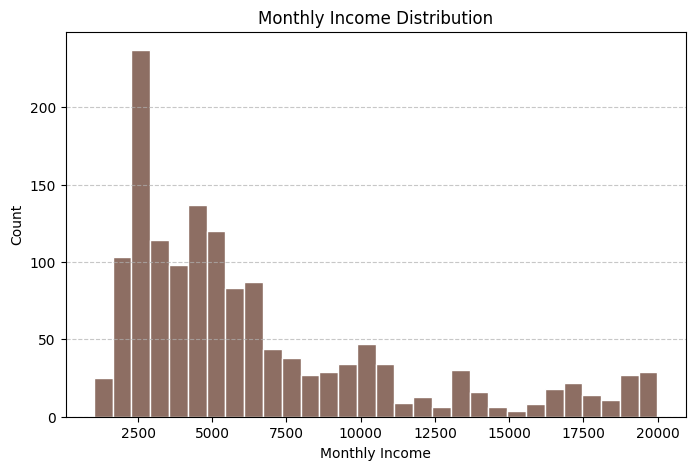

In [59]:
plt.figure(figsize=(8,5))
plt.hist(hr_df['MonthlyIncome'], bins=30, color='#8D6E63', edgecolor='white')
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

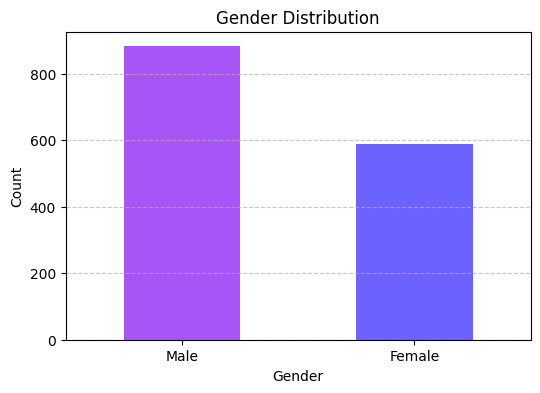

In [61]:
plt.figure(figsize=(6,4))
hr_df['Gender'].value_counts().plot(kind='bar', color=['#A855F7', '#6C63FF'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

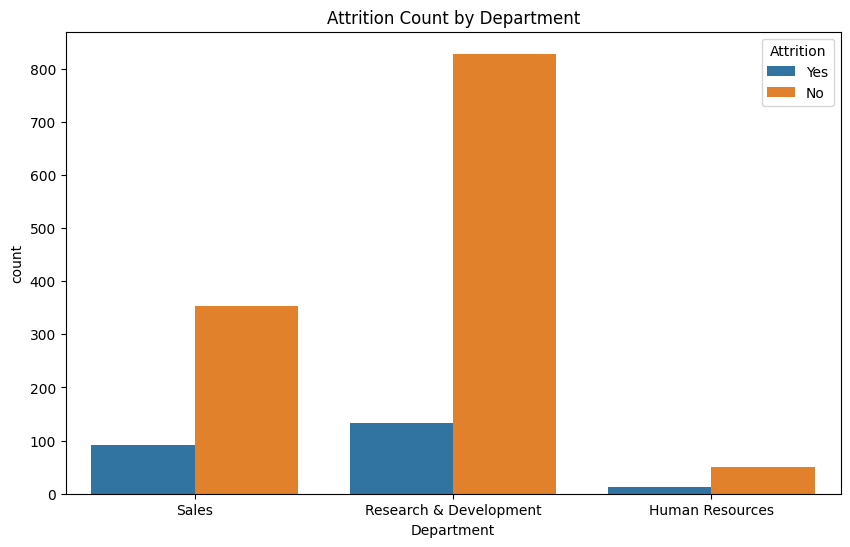

In [63]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(data=hr_df, x='Department', hue='Attrition')
plt.title("Attrition Count by Department")
plt.xticks(rotation=0)
plt.show()


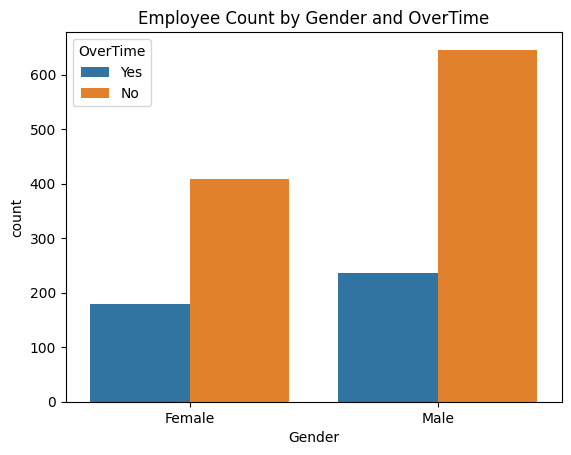

In [64]:
sns.countplot(data=hr_df, x='Gender', hue='OverTime')
plt.title("Employee Count by Gender and OverTime")
plt.show()

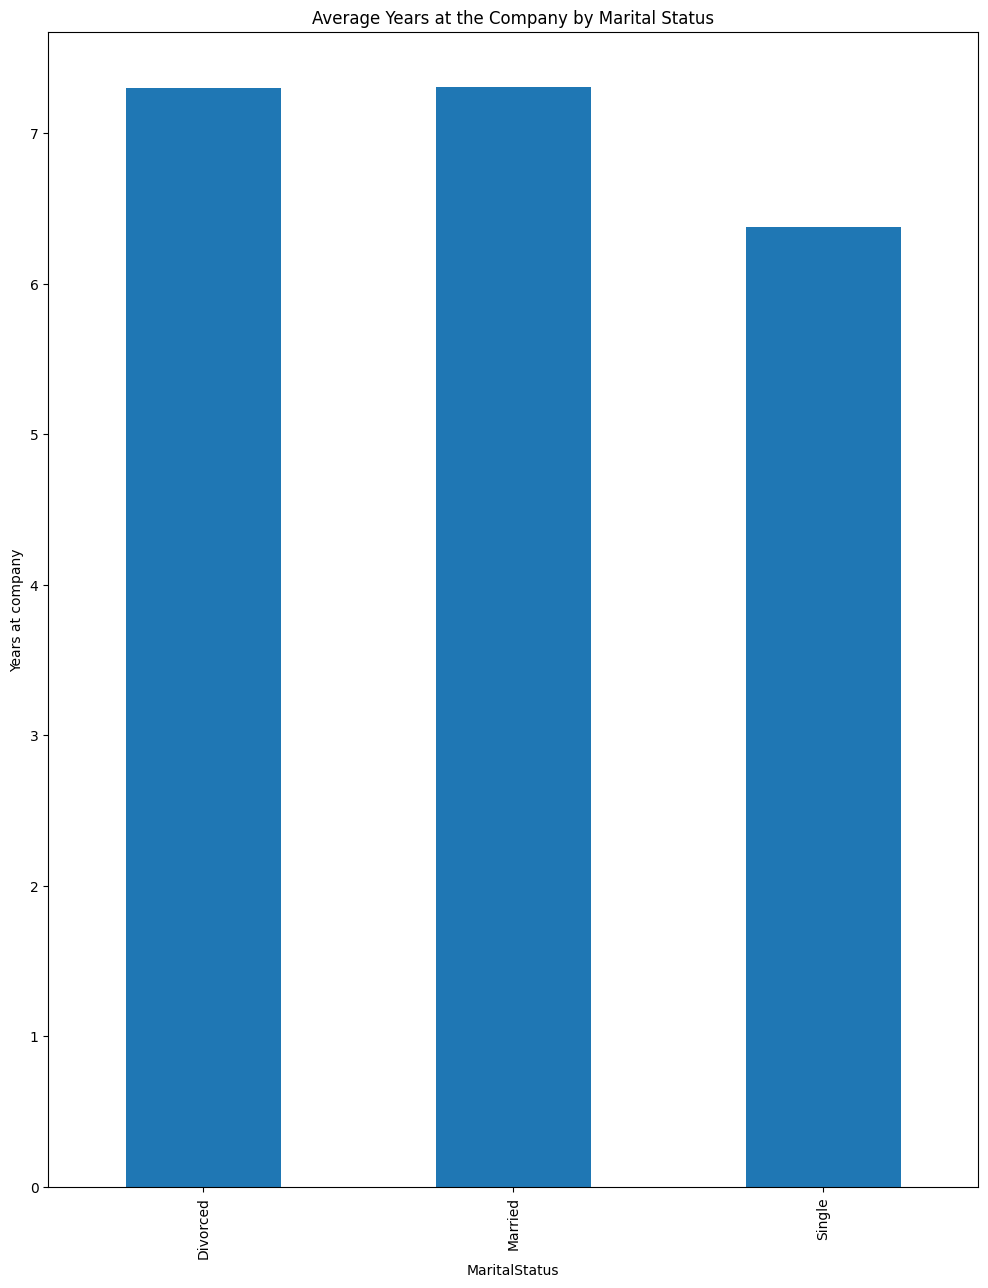

In [65]:
plt.figure(figsize=(12,15))
hr_df.groupby('MaritalStatus')['YearsAtCompany'].mean().plot(kind='bar')
plt.title("Average Years at the Company by Marital Status")
plt.ylabel("Years at company")
plt.show()

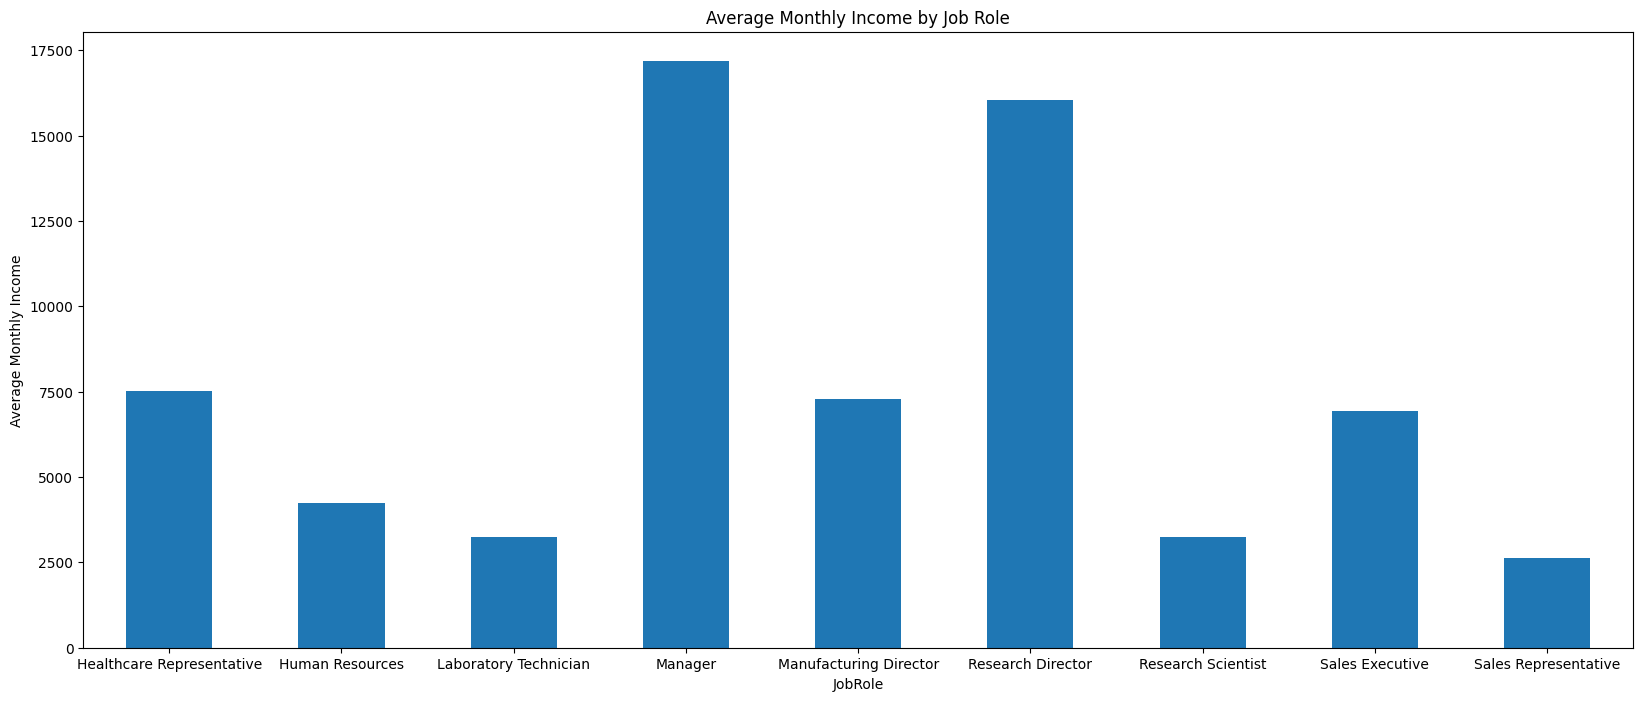

In [66]:
plt.figure(figsize=(20,8))
hr_df.groupby('JobRole')['MonthlyIncome'].mean().plot(kind='bar')
plt.title("Average Monthly Income by Job Role")
plt.ylabel("Average Monthly Income")
plt.xticks(rotation=0)
plt.show()

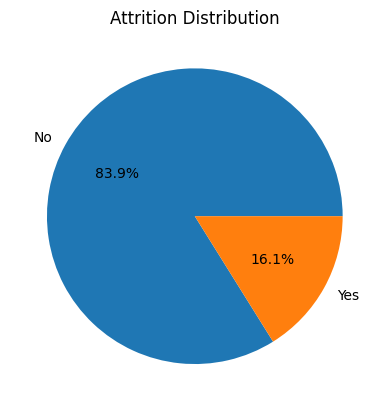

In [67]:
hr_df['Attrition'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Attrition Distribution")
plt.ylabel("")
plt.show()

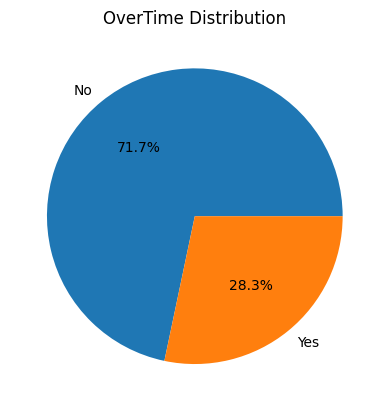

In [68]:
hr_df['OverTime'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("OverTime Distribution")
plt.ylabel("")
plt.show()

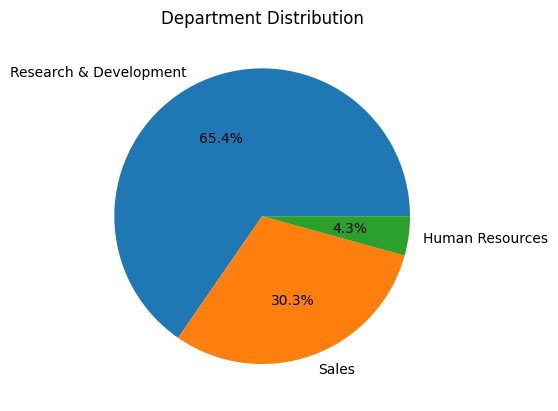

In [69]:
hr_df['Department'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Department Distribution")
plt.ylabel("")
plt.show()


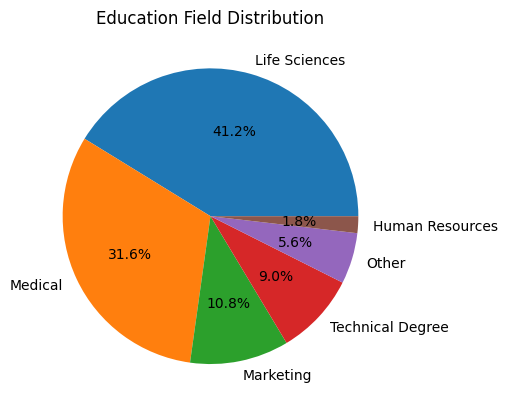

In [70]:
hr_df['EducationField'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Education Field Distribution")
plt.ylabel("")
plt.show()

The attrition rate is approximately 16.12%.

Frequent business travel is a significant factor contributing to higher attrition rates.

Among departments, the Sales department has the highest attrition rate, whereas Research & Development exhibits the lowest.

Male employees leave the company at a rate approximately 3% higher than female employees.

Employees who work beyond the standard workweek are more likely to leave the company compared to those working regular hours.

The attrition rate among single employees is significantly higher than that of married or divorced employees.

Directors and Managers have the lowest attrition rates within the company.

The Sales Representative role experiences the highest attrition rate among all job positions.

Among education fields, Human Resources has the highest attrition rate, while Medical has the lowest.

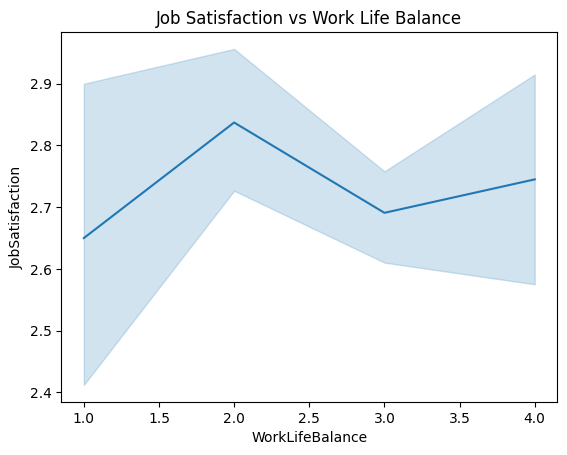

In [72]:
sns.lineplot(data=hr_df, x='WorkLifeBalance', y='JobSatisfaction')
plt.title("Job Satisfaction vs Work Life Balance")
plt.show()

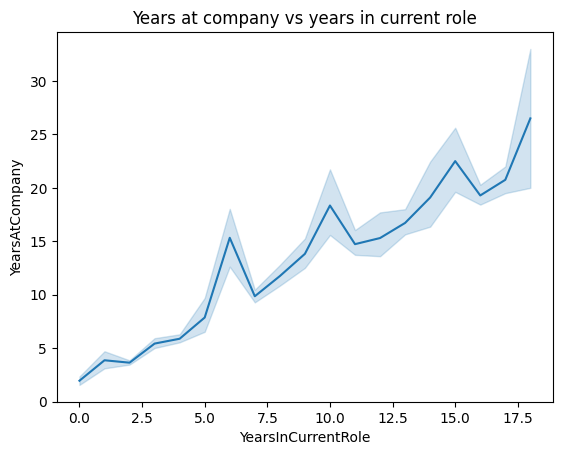

In [73]:
sns.lineplot(data=hr_df, x='YearsInCurrentRole', y='YearsAtCompany')
plt.title("Years at company vs years in current role")
plt.show()

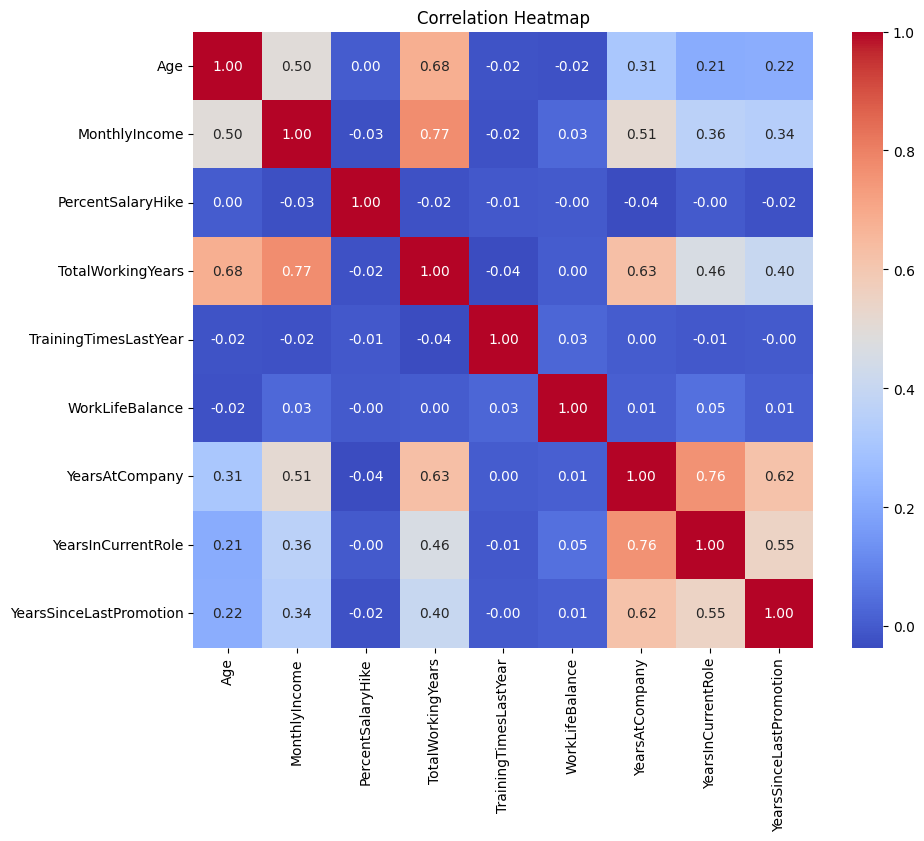

In [74]:
corr = hr_df[['Age', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears',
           'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
           'YearsInCurrentRole', 'YearsSinceLastPromotion']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipython-input-3330842305.py:1: FutureWarning: The provided callable <function mean at 0x7e10814437e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = hr_df.pivot_table(index='Department', columns='JobRole', values='MonthlyIncome', aggfunc=np.mean)


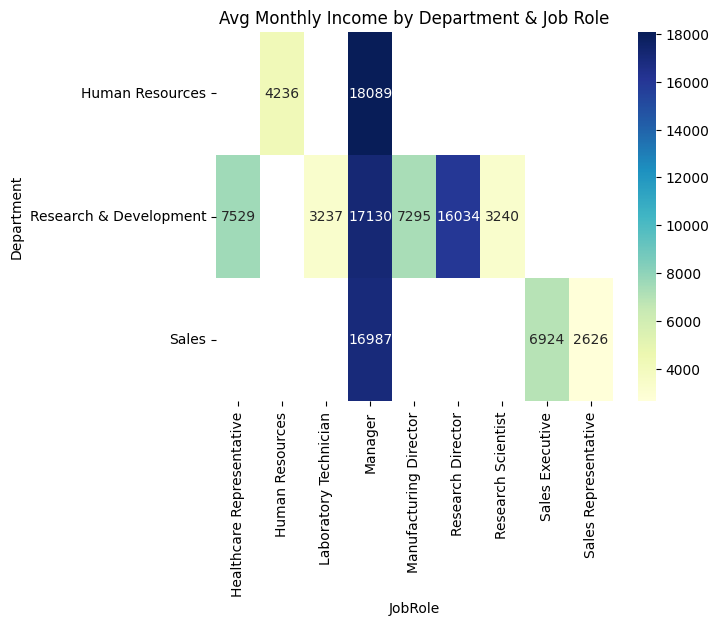

In [75]:
pivot = hr_df.pivot_table(index='Department', columns='JobRole', values='MonthlyIncome', aggfunc=np.mean)
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title("Avg Monthly Income by Department & Job Role")
plt.show()

/tmp/ipython-input-1392449816.py:1: FutureWarning: The provided callable <function mean at 0x7e10814437e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = hr_df.pivot_table(index='MaritalStatus', columns='Gender', values='YearsAtCompany', aggfunc=np.mean)


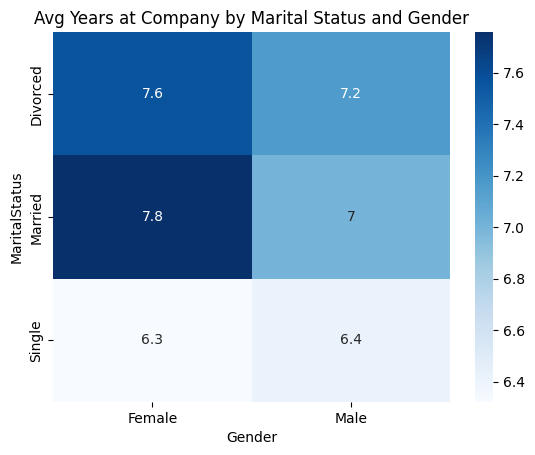

In [78]:
pivot = hr_df.pivot_table(index='MaritalStatus', columns='Gender', values='YearsAtCompany', aggfunc=np.mean)
sns.heatmap(pivot, annot=True, cmap='Blues')
plt.title("Avg Years at Company by Marital Status and Gender")
plt.show()

/tmp/ipython-input-1475123322.py:1: FutureWarning: The provided callable <function mean at 0x7e10814437e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = hr_df.pivot_table(index='WorkLifeBalance', columns='EnvironmentSatisfaction', values='JobSatisfaction', aggfunc=np.mean)


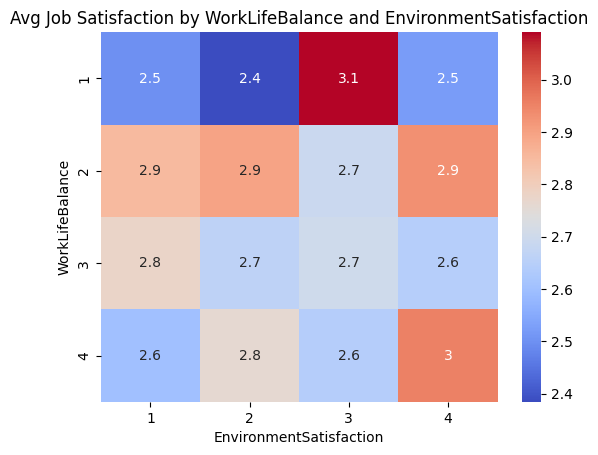

In [76]:
pivot = hr_df.pivot_table(index='WorkLifeBalance', columns='EnvironmentSatisfaction', values='JobSatisfaction', aggfunc=np.mean)
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Avg Job Satisfaction by WorkLifeBalance and EnvironmentSatisfaction")
plt.show()

# **Conclusion**

## Attrition Analysis

Overall Attrition Rate: The attrition rate is approximately 16.12%.

Business Travel Impact: Frequent business travel leads to higher attrition rates.

Departmental Differences: The Sales department has the highest attrition, while Research & Development has the lowest.

Gender Impact: Male employees leave at a rate 3% higher than female employees.
Workload Effect: Employees working beyond standard hours are more likely to leave.

Marital Status Influence: Single employees exhibit significantly higher attrition rates.

Job Role Effect: Directors and Managers have the lowest attrition, while Sales Representatives experience the highest turnover.

Education Field Influence: The Human Resources field has the highest attrition, while Medical has the lowest.

## Tenure & Promotions

Employees with less than a year under their current manager have the highest attrition.

Employees who haven't been promoted in the last year are more likely to leave.

Employees who spent less than a year in their current role exhibit higher attrition.

## Work-Life Balance & Satisfaction

Employees with a work-life balance index of 1 are highly prone to attrition.

Employees who had 0 or 4 training sessions last year have the highest
attrition, while 6 training sessions correlate with better retention.

Stock option levels 0 and 3 are linked to higher attrition rates, whereas levels 1 and 2 show better retention.

Higher job satisfaction reduces attrition.

## Salary & Experience Influence

Increasing salary hikes can help reduce attrition.

Employees with 2 to 5 prior employers or those in their first job show better retention.

Employees who worked at more than 5 companies have a higher turnover risk.

Monthly income is skewed and would benefit from log transformation.

## Feature Selection Insights

Features Over18, EmployeeCount, and StandardHours should be removed as they provide no predictive value.

EmployeeNumber, PerformanceRating, and BusinessTravel contribute minimally and may cause overfitting.

MonthlyIncome has outliers and requires handling.

## Final Thoughts

The analysis highlights key factors driving attrition. Improving work-life balance, optimizing training programs, adjusting salaries, and enhancing managerial effectiveness can help reduce employee turnover.